<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --upgrade --no-cache-dir -q


     |████████████████████████████████| 62 kB 13.3 MB/s 


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
START = "2019-10-01"  #yyyy-mm-dd
END = '2021-08-01'
START_testing='2021-09-01'

In [4]:
tker = '^nsei' #'^nsei'
df =yf.download(tker,start=START)
#nifty=quandl.get('BSE/BOM500112',start_date=START,end_date=END,authtoken='1Mz3xLNFNdUpKENCkArB')
#nifty = pdr.get_data_yahoo(tker, start=START, end=END)
df=df.dropna()
df=df.iloc[:,:4]

[*********************100%***********************]  1 of 1 completed


In [5]:
rapida = 18*1.2
lenta = 26*1.2
stdv =1.8
df['fast'] =df['Close'].ewm(span=rapida).mean()
df['slow'] =df['Close'].ewm(span=lenta).mean()
df['bband']= df['fast']-df['slow']
df['avg'] = df['bband'].rolling(window=10).mean()
df['Sdev'] = df['bband'].rolling(window=12).std()
df['Upper Band'] = df['avg'] + (df['Sdev'] *stdv)
df['Lower Band'] = df['avg'] - (df['Sdev'] *stdv)
df['spread'] = df['bband'] - df['Lower Band']
df['spread_1'] = -(df['bband'] - df['Upper Band'])

In [6]:
'''
rapida = 22*1.2
lenta = 32*1.2
stdv =1.2
'''

'\nrapida = 22*1.2\nlenta = 32*1.2\nstdv =1.2\n'

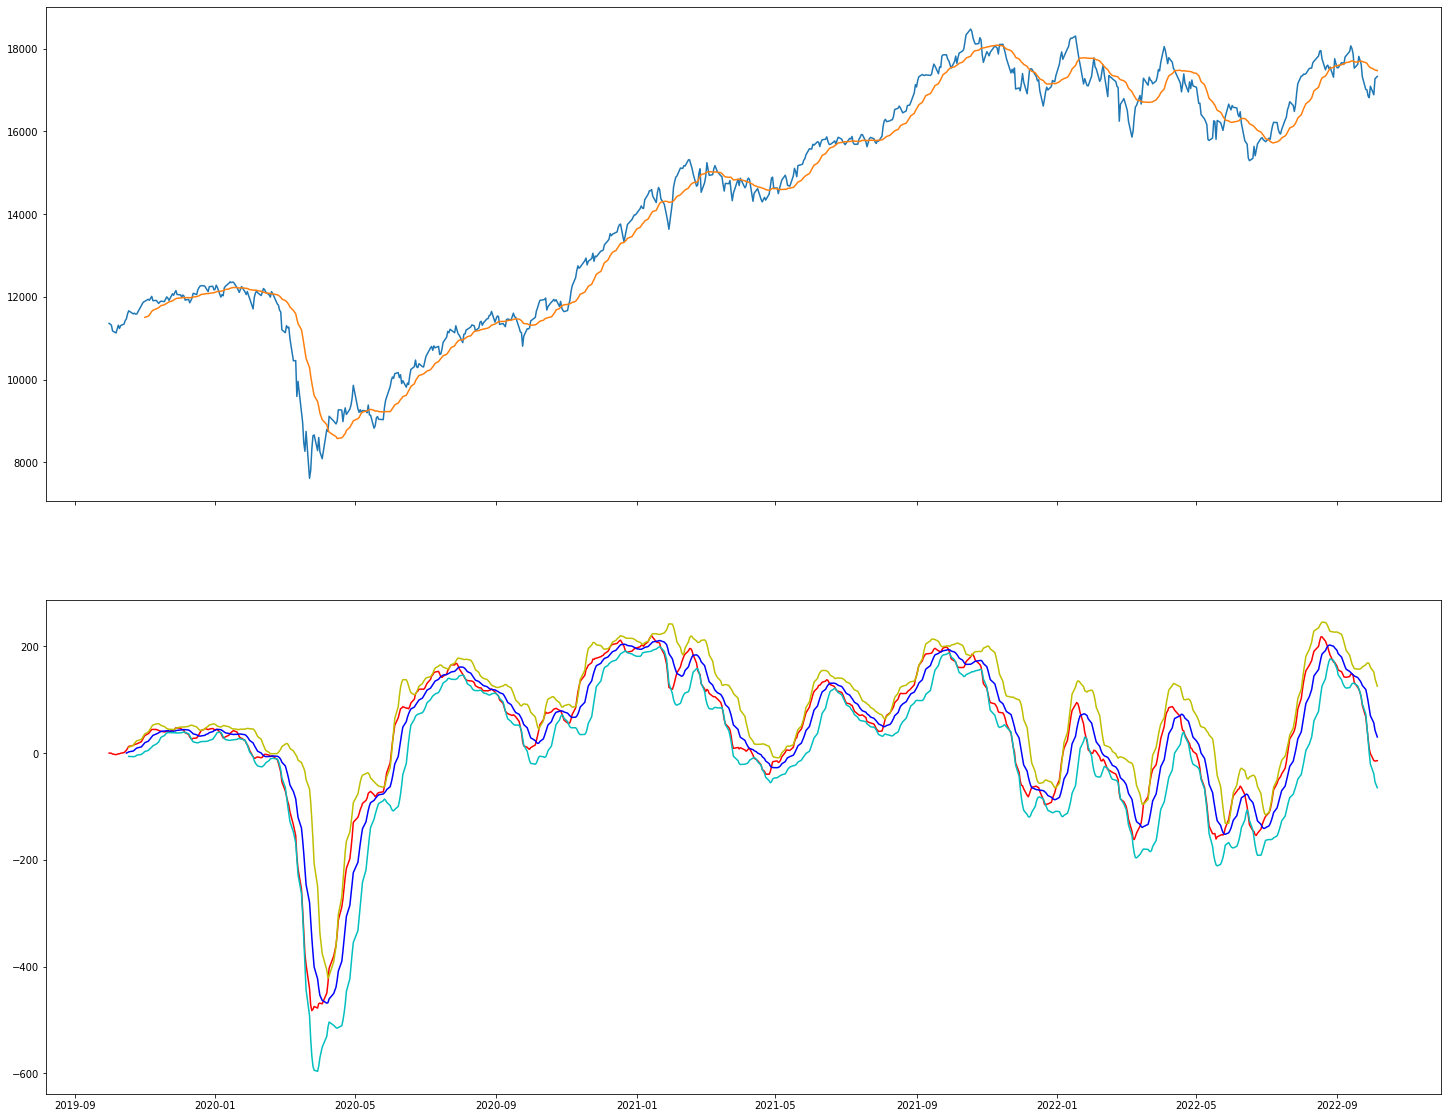

In [7]:
fig, ax = plt.subplots(2,1, figsize=(25,20),sharex=True)
ax[0].plot(df.loc[:, 'Close'])
ax[0].plot(df.loc[:, 'Close'].rolling(window=20).mean())
ax[1].plot(df[['bband']][:],color='r')
ax[1].plot(df[['avg',]][:],color='b')
ax[1].plot(df[['Upper Band',]][:],color='y')
ax[1].plot(df[['Lower Band']][:],color='c')
plt.show()